<a href="https://colab.research.google.com/github/Arhana02/sql-data-warehouse-project/blob/PGP-DSGA/Business_Report_PGP_DSGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

NumPy was imported to support numerical operations and efficient data handling.

In [ ]:
import pandas as pd

Pandas was imported to enable data loading, manipulation and analysis.

In [ ]:
import matplotlib.pyplot as plt

Matplotlib was imported to facilitate basic data visualization.

In [ ]:
import seaborn as sns

Seaborn was imported to create clearer and more informative visualizations.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Google Drive was mounted to access the dataset stored externally.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/austo_automobile .csv')

The dataset was successfully loaded into a DataFrame for further analysis.

#Data Overview

##Checking the Structure of the Data

In [ ]:
print(df.head())

   Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SU

This is a preliminary view of the dataset confirms that the data is well structured and consistenly formatted across records.

In [ ]:
print(df.tail())

      Age Gender Profession Marital_status Education  No_of_Dependents  \
1576   22   Male   Salaried         Single  Graduate                 2   
1577   22   Male   Business        Married  Graduate                 4   
1578   22   Male   Business         Single  Graduate                 2   
1579   22   Male   Business        Married  Graduate                 3   
1580   22   Male   Salaried        Married  Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
1576            No        Yes              No   33300             0.0   
1577            No         No              No   32000             NaN   
1578            No        Yes              No   32900             0.0   
1579           Yes        Yes              No   32200             NaN   
1580            No         No              No   31600             0.0   

      Total_salary  Price       Make  
1576         33300  27000  Hatchback  
1577         32000  31000  Hatchback  

This is a view of the last few records which confirms that the dataset is consistent throughout and follows the same structure as earlier entries.

In [ ]:
df.shape

(1581, 14)

From this we can understand, that the dataset contains an adequate number of records and variables, providing a sufficient base for analysis.

In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')


We can see that the dataset consists of clearly defined variables covering demographic and income-related information.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB
None


We can see that the structure of the dataset shows a mix of numerical and categorical variables with most fields containing complete data.

In [ ]:
print(df.isnull().sum())

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


This missing value check shows that only a few variables contain NULL values, which can be addressed without significantly impacting the overall dataset.

## Checking Data Types of All Columns

In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Profession,object
Marital_status,object
Education,object
No_of_Dependents,int64
Personal_loan,object
House_loan,object
Partner_working,object
Salary,int64


The data type check confirms that each variable is stroed in an appropriate format, with numerical and categorical fields correctly identified for analysis.

## Check for and treat (if needed) missing values

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [ ]:
#Treating the null values in the "Gender" column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

#Treating the null values in the "Partner Salary" Column
df['Partner_salary'] = df['Partner_salary'].fillna(df['Total_salary'] - df['Salary'])



*   Missing values in the **Gender** column were replaced with the most frequent category.
*   Missing **Partner Salary** values were logically derived using the difference between Total Salary and Salary.



In [ ]:
#Checking for NULL values after treating them
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


The post treatment check confirms that all missing values have successfully addressed in the dataset.

##Check the Statistical Summary

In [ ]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


The statistical summary suggests that the numerical variables are spread across expected ranges, with no unusual values observed.

##Check for and treat (if needed) data irregularities

In [ ]:
#Checking for duplicate records
df.duplicated().sum()

np.int64(0)

This shows that no duplicate records were found, indicating that each entry in the dataset is unique.

In [ ]:
#Checking for logical inconsistencies
df["Salary_mismatch"] = df["Total_salary"] != (df["Salary"] + df["Partner_salary"])
df["Salary_mismatch"].sum()

np.int64(0)

This hows that no logical inconsistencies were observed in the salary related fields of the dataset.

In [ ]:
#Checking for invalid or unrealistic values
(df[["Salary", "Partner_salary", "Total_salary"]] < 0).sum()

,0
Salary,0
Partner_salary,0
Total_salary,0


This shows that there are no invalid or unrealistic salary values in the dataset.

In [ ]:
#Checking consistency of Categorical Data

#Identifying Categorical columns
categorical_cols = df.select_dtypes(include='object').columns

#Checking unique values for each categorical column
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Gender:
['Male' 'Femal' 'Female' 'Femle']

Unique values in Profession:
['Business' 'Salaried']

Unique values in Marital_status:
['Married' 'Single']

Unique values in Education:
['Post Graduate' 'Graduate']

Unique values in Personal_loan:
['No' 'Yes']

Unique values in House_loan:
['No' 'Yes']

Unique values in Partner_working:
['Yes' 'No']

Unique values in Make:
['SUV' 'Sedan' 'Hatchback']


We observe that there is a categorical consistency only in the Gender column.

In [ ]:
#Correcting the data consistency in the Gender column
df["Gender"] = df["Gender"].replace(["Femal", "Femle"], "Female")

#Verifying after correction
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

I corrected the spelling in the Gender column by standardizing all values to a common format.

#Univariate Analysis

##Exploring all the variables(categorical & numerical) in the data

In [ ]:
#Identifying numerical and categorical variables
numerical_cols = df.select_dtypes(include = ["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include = "object").columns

numerical_cols, categorical_cols

(Index(['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary',
        'Price'],
       dtype='object'),
 Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
        'House_loan', 'Partner_working', 'Make'],
       dtype='object'))

We observe that the dataset contains a mix of numerical variables related to age, dependents, salary, pricing, along with categorical variables capturing demographic and preference related information.

###For numerical variables

In [ ]:
#Statistical summary
df[numerical_cols].describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


From the output that I received, I can observe the following:


*   The dataset contains 1581 customer records, with the average age being 32 years, indicating a predominantly working age population.
*   Most customers have 2 to 3 dependents, suggesting moderate household sizes.


*   Individual salaries show considerable variation, ranging from : 30,000 to 99,300$, reflecting diverse income levels.



*   Partner salaries vary widely, including cases with no partner income, which impacts total household earnings.


*   Total household income ranges from 30,000 to 1,71,000$, indicating differences in overall purchasing power.
*   Vehicle prices also vary significantly, suggesting customers across multiple budget segments.







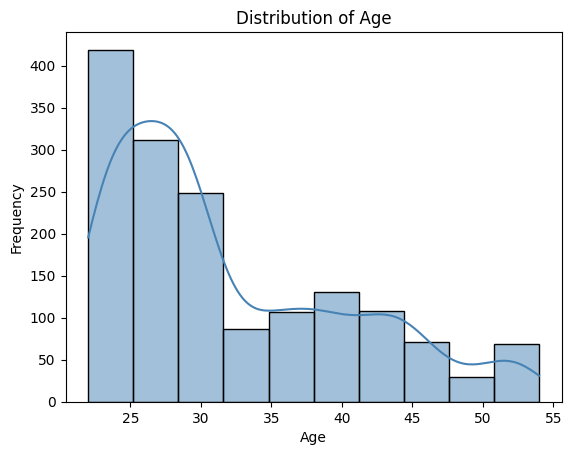

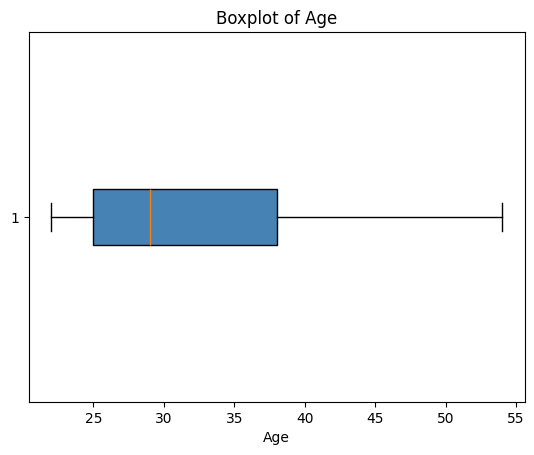

In [ ]:
#Distribution plots for "Age"
#Histogram
plt.figure()
sns.histplot(df["Age"], bins = 10, kde =True, color='steelblue',edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Boxplot
plt.figure()
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()



*   The age distribution is concentrated among younger individuals, primarily between the mid-20s and mid-30s.
*   The data shows a slight right skew, with fewer observations at higher age levels.


*   Most customers fall within a moderate age range, indicating a predominantly working age population.
*   The boxplot suggests limited extreme values, with no significant outliers impacting the distribution.





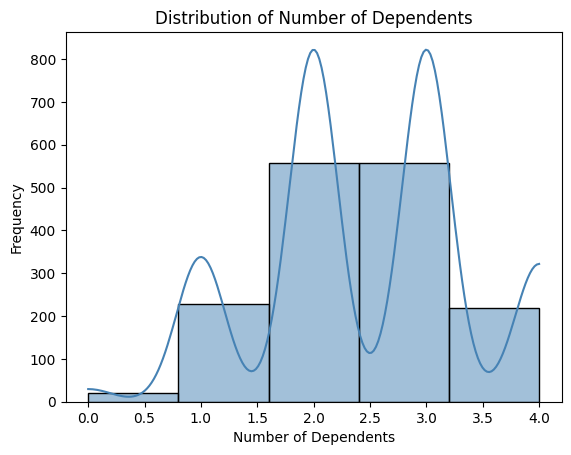

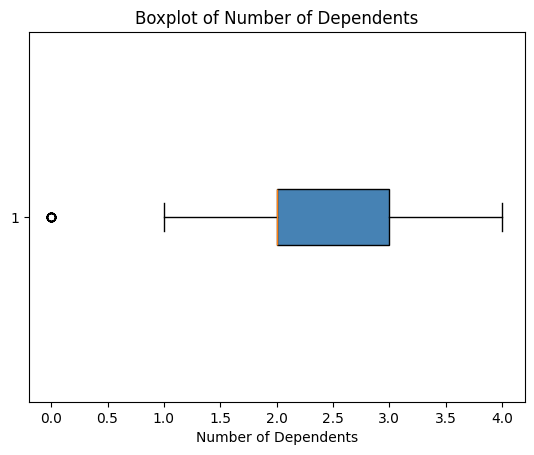

In [ ]:
#Distribution plots for 'Number of Dependents'
#Histogram
plt.figure()
sns.histplot(df["No_of_Dependents"], bins = 5,kde = True, color='Steelblue',edgecolor='black')
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.show()

#Boxplot
plt.figure()
plt.boxplot(df['No_of_Dependents'], vert=False, patch_artist=True, boxprops=dict(facecolor='Steelblue'))
plt.title('Boxplot of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.show()



*   Most customers have 2 to 3 dependents, indicating moderate household sizes.

*   Very few customers have no dependents, as seen from the lower frequency values.
*   The distribution is fairly balanced with a slight concentration around the middle values.


*   The boxplot shows limited variability with no significant extreme values affecting the data.



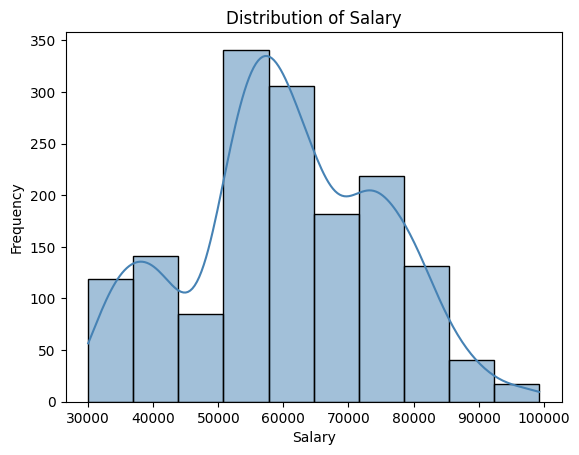

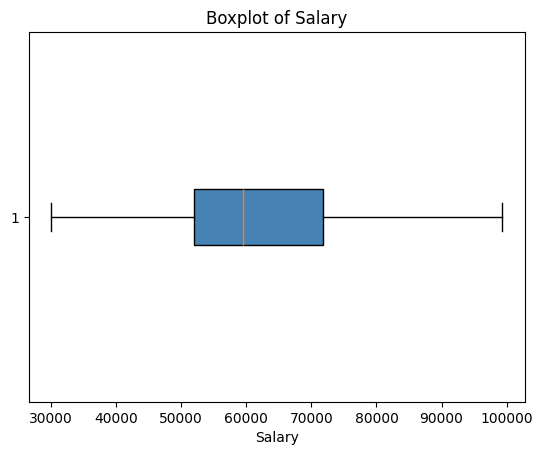

In [ ]:
#Distribution plots for 'Salary'
#Histogram
plt.figure()
sns.histplot(df["Salary"], bins = 10,kde = True, color='Steelblue',edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#Boxplot
plt.figure()
plt.boxplot(df['Salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='Steelblue'))
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()



*   Salaries are mainly concentrated in the mid-income range, with most values between approximately 50,000 and 75,000$.

*   The distribution shows a slight right skew, indicating fewer high income individuals.
*   Salary values display a moderate spread, reflecting income diversity among customers.


*   The boxplot indicates no extreme outliers, suggesting stable and reliable salary data.



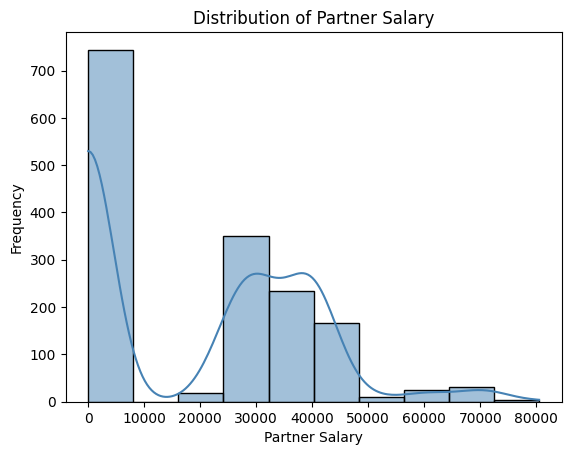

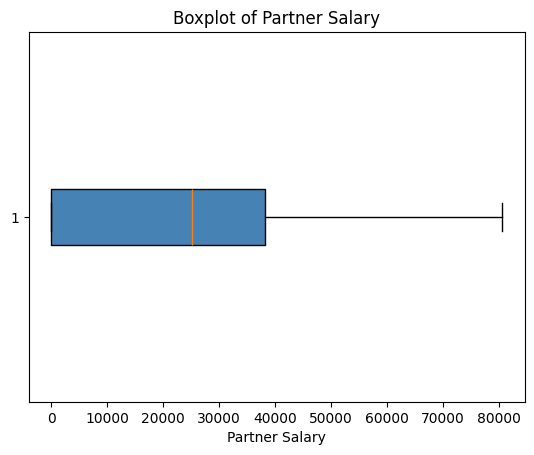

In [ ]:
#Distribution plots for 'Partner Salary'
#Histogram
plt.figure()
sns.histplot(df["Partner_salary"], bins = 10, kde = True, color='Steelblue',edgecolor='black')
plt.title('Distribution of Partner Salary')
plt.xlabel('Partner Salary')
plt.ylabel('Frequency')
plt.show()

#Boxplot
plt.figure()
plt.boxplot(df['Partner_salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='Steelblue'))
plt.title('Boxplot of Partner Salary')
plt.xlabel('Partner Salary')
plt.show()



*   A large proportion of records show low or zero partner salary, indicating many single income households.

*   Partner salary values display variability, ranging from zero to higher income levels.
*   The distribution is right skewed, with fewer cases of high partner income.


*   The boxplot indicates the presence of extreme values, though they represent a small portion of the data.



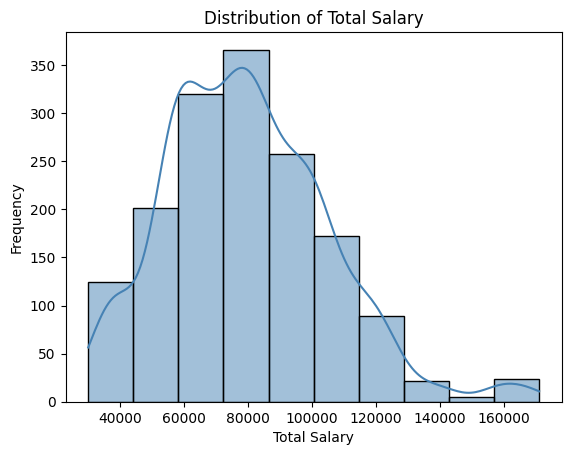

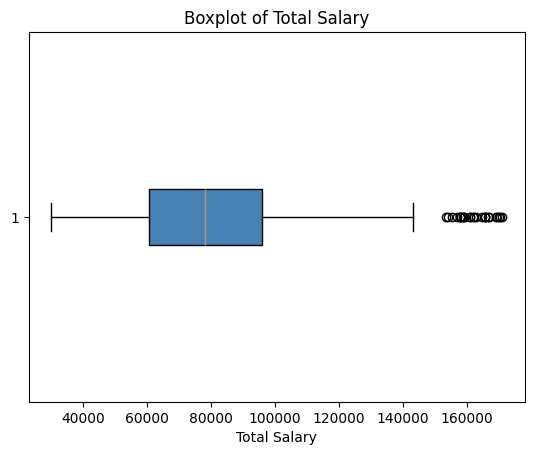

In [ ]:
#Distribution plots for 'Total Salary'
#Histogram
plt.figure()
sns.histplot(df["Total_salary"], bins = 10, kde = True, color='Steelblue',edgecolor='black')
plt.title('Distribution of Total Salary')
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.show()

#Boxplot
plt.figure()
plt.boxplot(df['Total_salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='Steelblue'))
plt.title('Boxplot of Total Salary')
plt.xlabel('Total Salary')
plt.show()



*   Total household income is mainly concentrated in the mid income range, indicating a majority of moderate earning households.

*   The distribution shows a right skew, driven by a smaller group of high income households.
*   Income levels exhibit considerable variation, reflecting diverse earning capacities across customers.


*   The boxplot highlights the presence of high end outliers, representing a limited number of higher income cases.




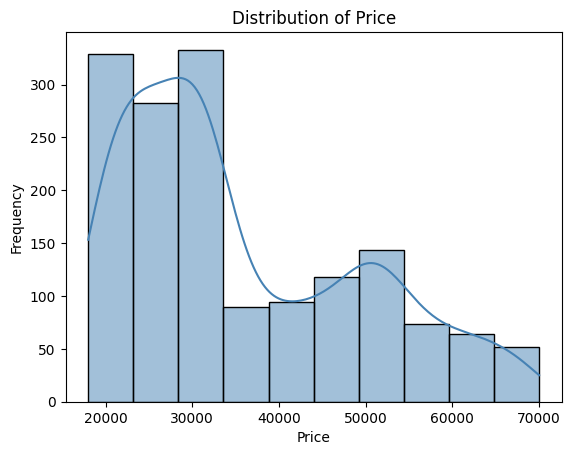

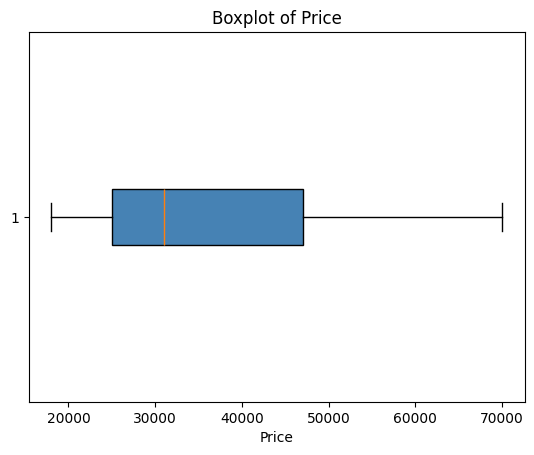

In [ ]:
#Distribution plots for 'Price'
#Histogram
plt.figure()
sns.histplot(df["Price"], bins = 10, kde = True, color='Steelblue',edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Boxplot
plt.figure()
plt.boxplot(df['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='Steelblue'))
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()



*   Vehicle prices are mainly concentrated in the lower to mid price range, indicating affordability focused customer segments.

*   The distribution shows a right skew, with fewer high priced vehicles.
*   Price levels exhibit a wide spread, reflecting multiple product offerings across proce points.


*   The boxplot indicates some higher end values, though they represent a smaller portion of the dataset.



###For Categorical Variables

In [ ]:
#Frequency counts
for col in categorical_cols:
  print(f'\nValue counts for {col}:')
  print(df[col].value_counts())


Value counts for Gender:
Gender
Male      1252
Female     329
Name: count, dtype: int64

Value counts for Profession:
Profession
Salaried    896
Business    685
Name: count, dtype: int64

Value counts for Marital_status:
Marital_status
Married    1443
Single      138
Name: count, dtype: int64

Value counts for Education:
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

Value counts for Personal_loan:
Personal_loan
Yes    792
No     789
Name: count, dtype: int64

Value counts for House_loan:
House_loan
No     1054
Yes     527
Name: count, dtype: int64

Value counts for Partner_working:
Partner_working
Yes    868
No     713
Name: count, dtype: int64

Value counts for Make:
Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64


From the output that I received, I observed the following:


*   The customer base is predominantly male, with females representing a smaller segment.

*   A larger proportion of customers are salaried professionals, followed closely by those in business.

*   Most customers are married, indicating a family oriented customer profile.

*   Post graduates form the majority, suggesting a relatively well educated customer base.
*   Personal loan ownership is almost evenly split between customers with and without loans.


*   A higher number of customers do not have a house loan, indicating lower long term debt exposure for most.


*   In many households, the partner is working, contributing to overall household income.


*   Sedans are the most preferred vehicle type, followed by hatchbacks, while SUVs form a smaller segment.



/tmp/ipython-input-3384140825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Gender'], data = df, palette = 'Blues', edgecolor = 'black')


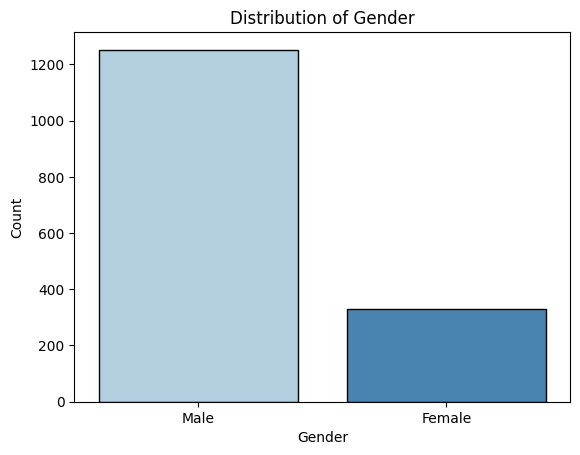

In [ ]:
#Distribution plots for 'Gender'
#Bar charts
plt.figure()
sns.countplot(x = df['Gender'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



*   The customer base is predominantly male, with females forming a smaller segment.
*   There is a noticeable gender imbalance, indicating higher representation of male customers.


*   This distribution suggests potential opportunities for targeted outreach toward female customers.






/tmp/ipython-input-862561467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Profession'], data = df, palette = 'Blues', edgecolor = 'black')


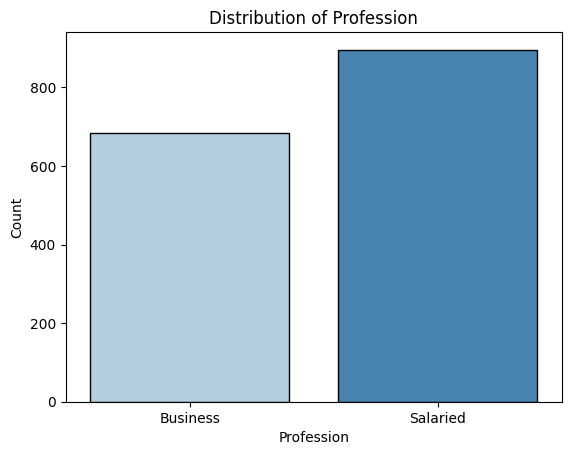

In [ ]:
#Distribution plots for 'Profession'
#Bar charts
plt.figure()
sns.countplot(x = df['Profession'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()



*   Salaried professionals form the larger share of the customer base.

*   Business owners also represent a significant portion, though smaller than salaried customers.
*   The distribution indicates a customer profile with stable and regular income sources, which is favorable for financial decision making.





/tmp/ipython-input-3688215978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Marital_status'], data = df, palette = 'Blues', edgecolor = 'black')


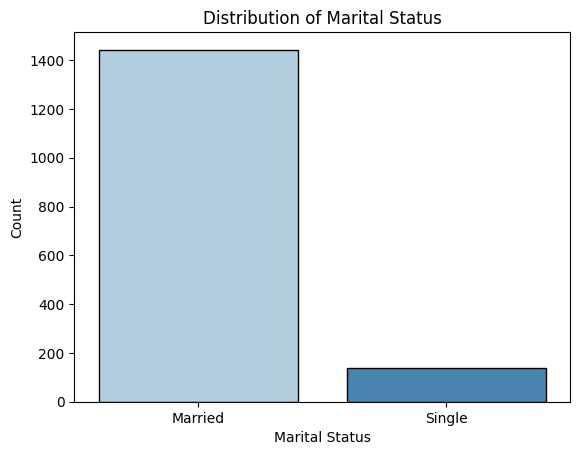

In [ ]:
#Distribution plots for 'Marital Status'
#Bar charts
plt.figure()
sns.countplot(x = df['Marital_status'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



*   The majority of customers are married, forming the dominant segment.

*   Single customers represent a much smaller proportion of the dataset.
*   This suggests a large family oriented customer base, which may influence financial and purchasing decisions.





/tmp/ipython-input-200159683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Education'], data = df, palette = 'Blues', edgecolor = 'black')


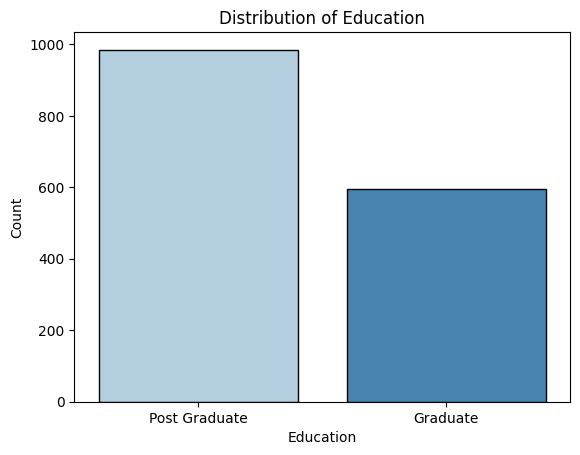

In [ ]:
#Distribution plots for 'Education'
#Bar charts
plt.figure()
sns.countplot(x = df['Education'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()



*   Post graduates form the majority of the customer base.

*   Graduates also represent a significant segment, though smaller in comparison.
*   Overall, the dataset reflects a well educated customer profile, which may influence purchasing behaviour.






/tmp/ipython-input-3002733472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Personal_loan'], data = df, palette = 'Blues', edgecolor = 'black')


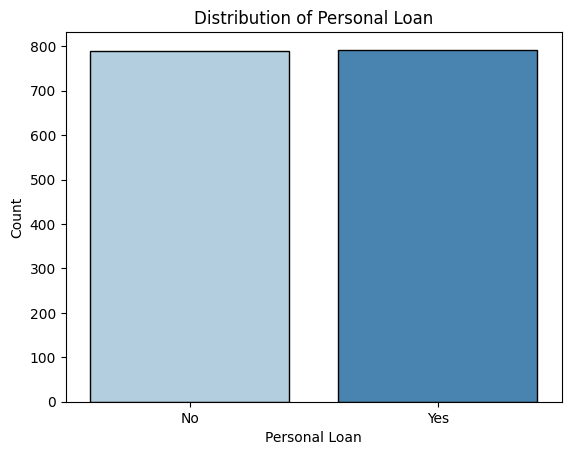

In [ ]:
#Distribution plots for 'Personal Loan'
#Bar charts
plt.figure()
sns.countplot(x = df['Personal_loan'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()



*   Customers with and without personal loans are almost equally represented.

*   This indicates a balanced mix of borrowing and non borrowing customers.
*   The distribution suggests potential opportunities for targetted loan offerings across both segments.





/tmp/ipython-input-485870533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['House_loan'], data = df, palette = 'Blues', edgecolor = 'black')


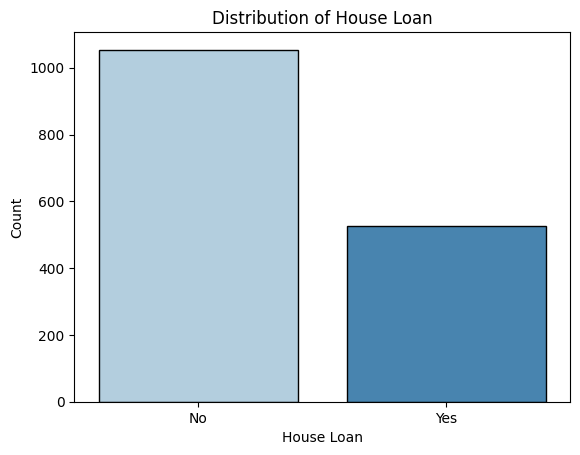

In [ ]:
#Distribution plots for 'House Loan'
#Bar charts
plt.figure()
sns.countplot(x = df['House_loan'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of House Loan')
plt.xlabel('House Loan')
plt.ylabel('Count')
plt.show()



*   A majority of customers do not have a house loan.

*   A smaller but notable segment of customers have an existing house loan.
*   This suggests relatively lower long term housing debt among most customers.





/tmp/ipython-input-2841633167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Partner_working'], data = df, palette = 'Blues', edgecolor = 'black')


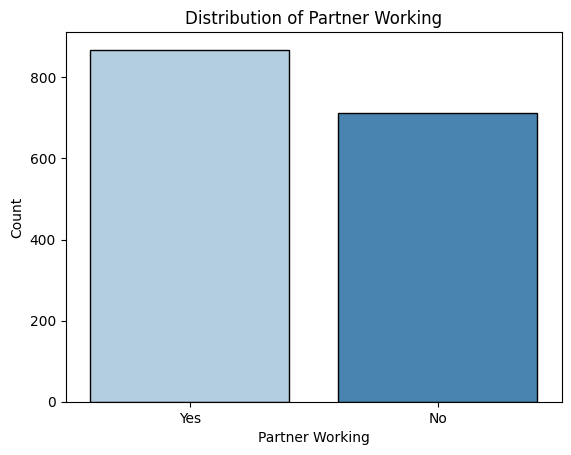

In [ ]:
#Distribution plots for 'Partner Working'
#Bar charts
plt.figure()
sns.countplot(x = df['Partner_working'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of Partner Working')
plt.xlabel('Partner Working')
plt.ylabel('Count')
plt.show()



*   A slight majority of customers have a working power.

*   A significant portion of customers have a non working partner, indicating single income households.
*   This distribution highlights variation in household income structures.





/tmp/ipython-input-3269053940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Make'], data = df, palette = 'Blues', edgecolor = 'black')


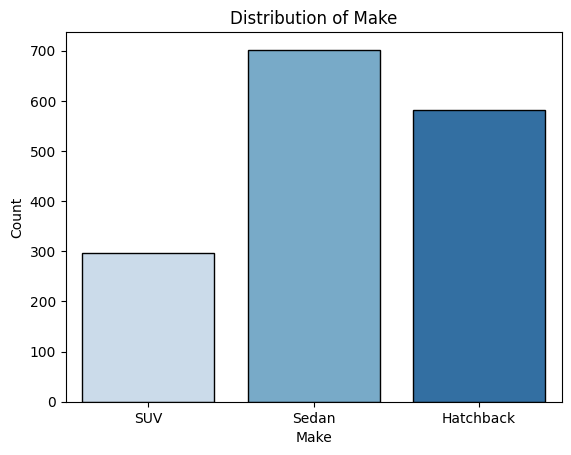

In [ ]:
#Distribution plots for 'Make'
#Bar charts
plt.figure()
sns.countplot(x = df['Make'], data = df, palette = 'Blues', edgecolor = 'black')
plt.title('Distribution of Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()



*   Sedans are the most preferred vehicle type among customers.

*   Hatchbacks also have strong representation, indicating demand for compact vehicles.
*   SUVs form the smallest segment, suggesting comparatively lower preferences for larger vehicles.





##Check for and treat(if needed) outliers

In [ ]:
#Identifying numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary',
       'Price'],
      dtype='object')

###Visual Inspection of Outliers using Boxplot

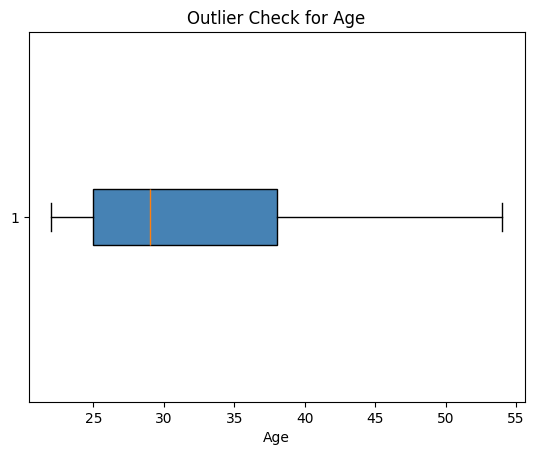

In [ ]:
#Check for Outliers in the 'Age' column
plt.figure()
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Outlier Check for Age')
plt.xlabel('Age')
plt.show()



*   The age values are mostly concentrated within a reasonable range.

*   No significant extreme outliers are observed in the age distribution.
*   The data appears stable and suitable for further analysis without outlier treatment.






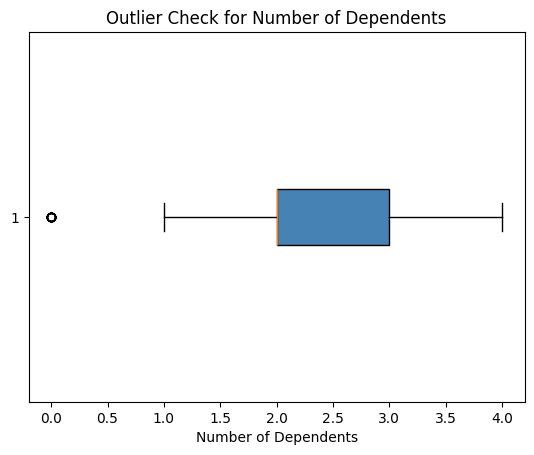

In [ ]:
#Check for Outliers in the 'Number of Dependents' column
plt.figure()
plt.boxplot(df['No_of_Dependents'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Outlier Check for Number of Dependents')
plt.xlabel('Number of Dependents')
plt.show()



*   Most values fall within the expected range of 1 to 4 dependents.

*   A small number of low end outliers(zero dependents) are observed.
*   These outliers appear valid and realistic, and do not require treatment.


*   List item



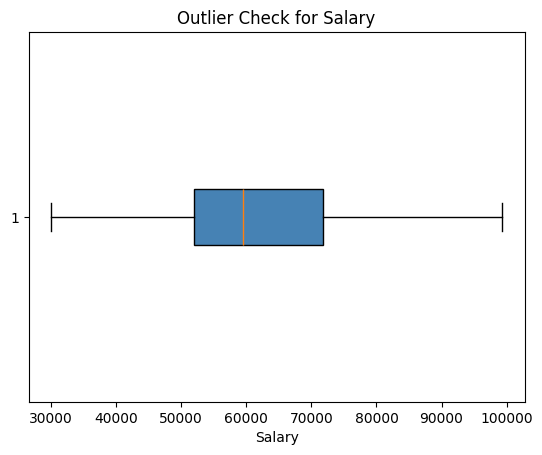

In [ ]:
#Check for Outliers in the 'Salary' column
plt.figure()
plt.boxplot(df['Salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Outlier Check for Salary')
plt.xlabel('Salary')
plt.show()



*   Salary values are largely within a consistent and reasonable range.

*   No significant extreme outliers are observed in the salary distribution.
*   The data appears stable, and no outlier treatment is required at this stage.






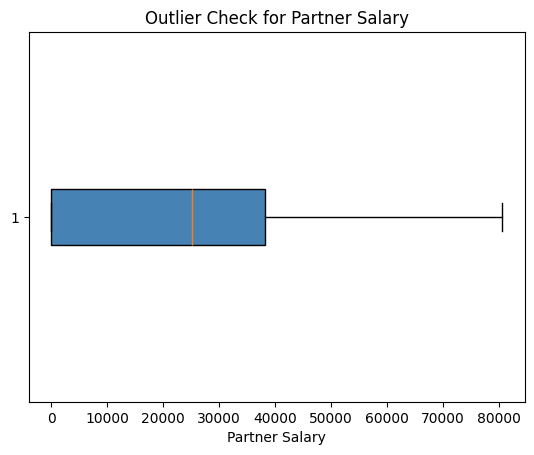

In [ ]:
#Check for Outliers in the 'Partner Salary' column
plt.figure()
plt.boxplot(df['Partner_salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Outlier Check for Partner Salary')
plt.xlabel('Partner Salary')
plt.show()



*   Partner salary values show a wide spread, including zero income cases.

*   A few high value outliers are visible are visible on the upper end of the distribution.
*   These outliers offer valid and may represent higher earning partners, so no immediate treatment is required.






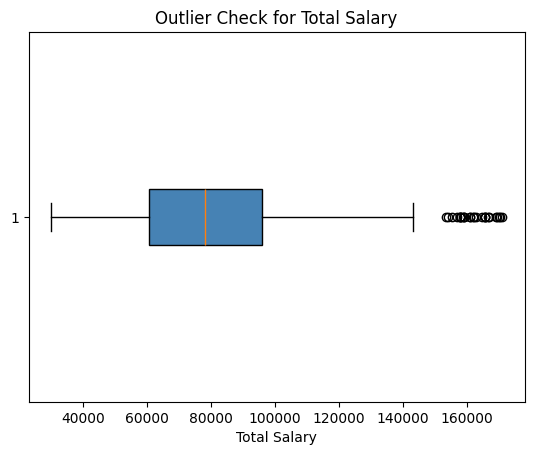

In [ ]:
#Check for Outliers in the 'Total Salary' column
plt.figure()
plt.boxplot(df['Total_salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Outlier Check for Total Salary')
plt.xlabel('Total Salary')
plt.show()



*   Most total salary values lie within a reasonable and consistent range.

*   A small number of high income outliers are present on the upper end of the distribution.
*   These outliers like represent genuinely high earning households.




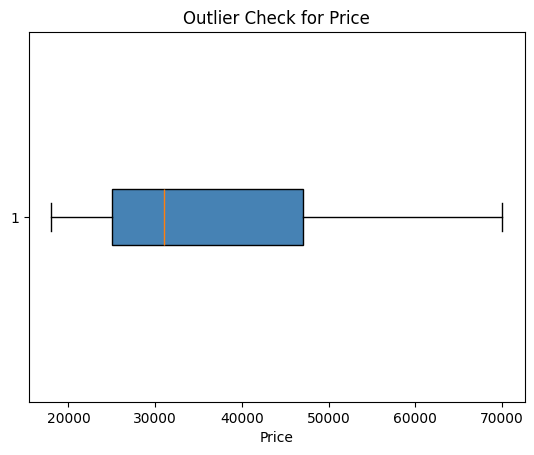

In [ ]:
#Check for Outliers in the 'Price' column
plt.figure()
plt.boxplot(df['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Outlier Check for Price')
plt.xlabel('Price')
plt.show()



*   Price values are distributed within a reasonable and expected range.

*   No extreme outliers are observed in vehicle prices.
*   The pricing data appears stable. and suitable for further analysis.






###Detecting outliers using IQR method

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_cols] < (Q1-1.5*IQR)) | (df[numerical_cols] > (Q3+1.5*IQR)))
print(outliers.sum())

Age                  0
No_of_Dependents    20
Salary               0
Partner_salary       0
Total_salary        27
Price                0
dtype: int64


###Treating Outliers

In [ ]:
#Treating outliers in 'Number of Dependents' column
Q1 = df['No_of_Dependents'].quantile(0.25)
Q3 = df['No_of_Dependents'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['No_of_Dependents'] = df['No_of_Dependents'].clip(lower,upper)

#Re-check outliers after treatment
outliers_dependents = df[(df['No_of_Dependents'] < lower) | (df['No_of_Dependents'] > upper)]

print(outliers_dependents.shape[0])

0


I treated the outliers in the "Number of Dependents" column using IQR based capping and a recheck confirmed that there are no outliers.

In [ ]:
#Treating outliers in 'Total Salary' column
Q1 = df['Total_salary'].quantile(0.25)
Q3 = df['Total_salary'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['No_of_Dependents'] = df['No_of_Dependents'].clip(lower,upper)

#Re-check outliers after treatment
outliers_total_salary = df[(df['Total_salary'] < lower) | (df['Total_salary'] > upper)]

print(outliers_dependents.shape[0])

0


I treated the high end outliers in the "Total Salary" column using IQR based capping and a subsequent check confirmed that there are no outliers.

#Bivariate Analysis

##Exploring the relationship between all numerical variables.

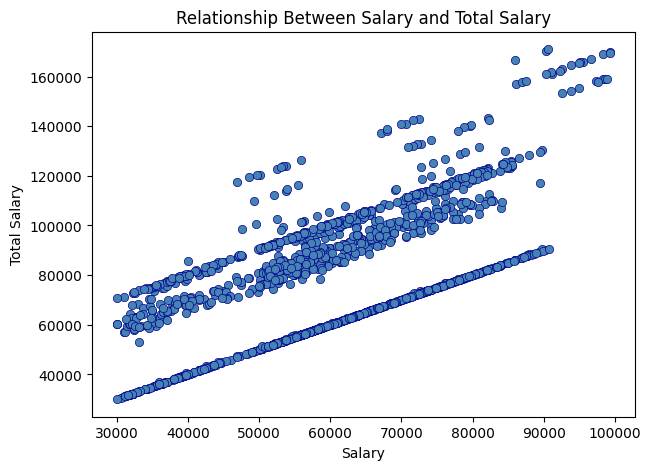

In [ ]:
#Salary vs Total Salary
plt.figure(figsize=(7,5))
sns.scatterplot(x='Salary', y='Total_salary', data=df, color='steelblue', edgecolor='darkblue')
plt.title('Relationship Between Salary and Total Salary')
plt.xlabel('Salary')
plt.ylabel('Total Salary')
plt.show()



*   We can see as individual salary increases, total household income also increases, showing a clear and expected trend.

*   The upward pattern in the plot indicated that salary in a key driver of total income.
*   The spread of points suggests that partner income adds to the variation in total salary.


*   Overall, the relationship looks strong and fairly consistent, with no unusual deviations.



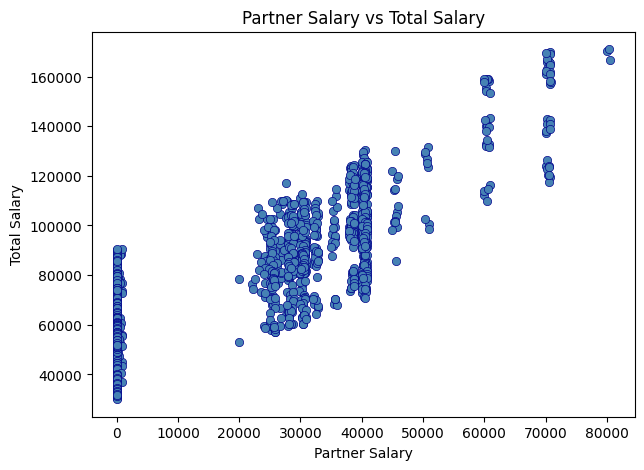

In [ ]:
#Partner Salary vs Total Salary
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Partner_salary', y ='Total_salary',data=df, color='steelblue', edgecolor = 'darkblue')
plt.xlabel('Partner Salary')
plt.ylabel('Total Salary')
plt.title('Partner Salary vs Total Salary')
plt.show()



*   Total household income generally increases as partner salary increases, showing a clear upward trend.

*   Households with no partner income cluster at lower total salary levels, forming a distinct group.
*   The spread of points suggets that partner income significantly adds to overall household earnings.


*   Overall, the relationship appears strong and intuitive, with no unusual patterns.



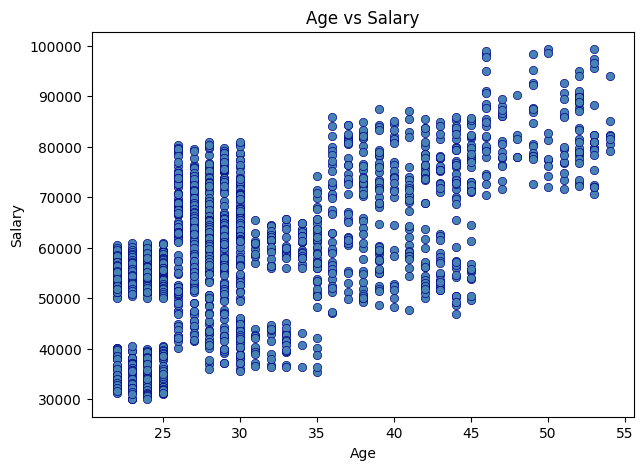

In [ ]:
#Age vs Salary
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Salary', data=df, color = 'Steelblue', edgecolor = 'darkblue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()



*   Salary generally tends to increase with age, reflecting career progression over time.

*   Younger individuals mostly fall into lower to mid salary ranges, whike older customers show higher earning levels.
*   There is noticeable spread at most ages, indicating that income varies even within the same age group.


*   Overall, the relationship appears positive but not perfectly linear.



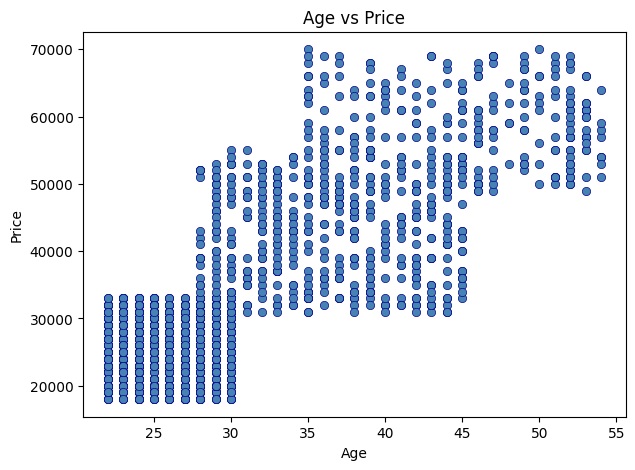

In [ ]:
#Total Age vs Price
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Price', data=df, color = 'Steelblue', edgecolor = 'darkblue')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age vs Price')
plt.show()



*   Vehicle price generally increases with age, showing an upward trend.

*   Younger customers are mostly clustered around lower priced vehicles.
*   As age increases, the price range becomes wider, indicating varied purchasing power.


*   Overall, the relationship appears positive but not perfectly linear.



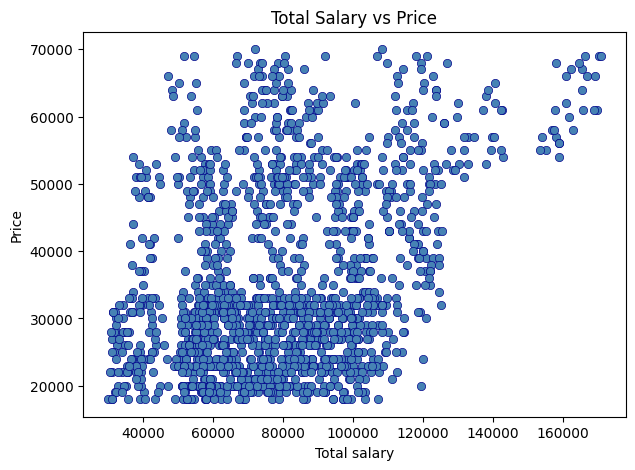

In [ ]:
#Total Salary vs Price
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_salary', y='Price',data=df,color='Steelblue' ,edgecolor = 'darkblue')
plt.xlabel('Total salary')
plt.ylabel('Price')
plt.title('Total Salary vs Price')
plt.show()



*   Customers with higher total household income tend to consider higher priced vehicles, though the trend is not very tight.

*   A large number of customers cluster in the lower to mid price range, regardless of income level.
*   The spread of points suggests that factors beyond income also influence vehicle price decisions.


*   Overall, the relationship appears positive but moderate, rather than strongly linear.



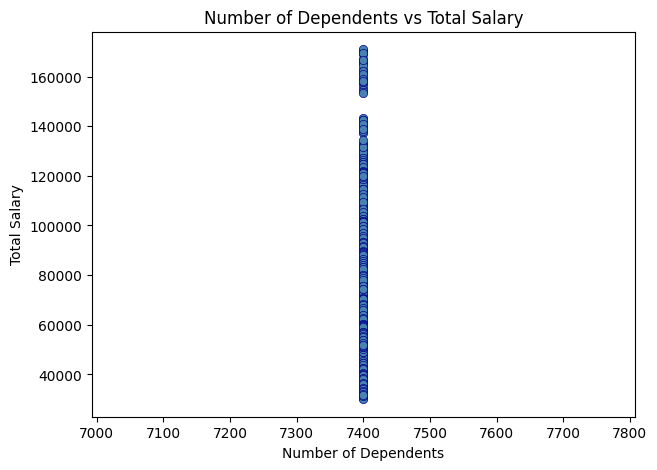

In [ ]:
#Number of Dependents vs Total Salary
plt.figure(figsize=(7,5))
sns.scatterplot(x='No_of_Dependents', y='Total_salary',data=df,color='Steelblue' ,edgecolor = 'darkblue')
plt.xlabel('Number of Dependents')
plt.ylabel('Total Salary')
plt.title('Number of Dependents vs Total Salary')
plt.show()



*   We cannot see any clear pattern between the number of dependents and total household income.

*   Income values are widely spread across the same dependent count, indicating high variability.
*   This suggests that the number of dependents does not directly influence total salary in the dataset.


*   Overall, the relationship between these two variables appears weak and largely scattered.



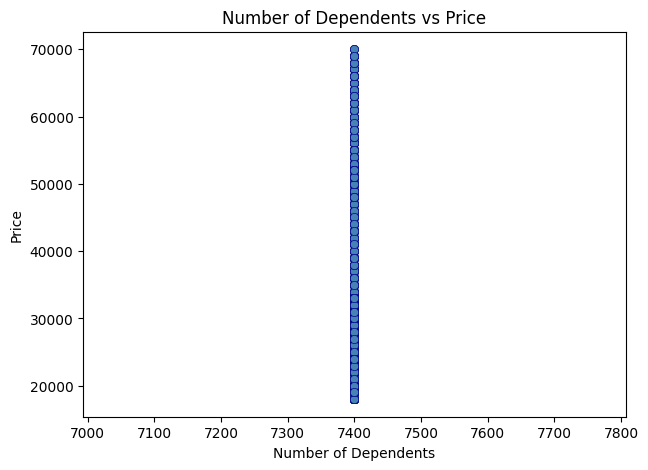

In [ ]:
#Number of Dependents vs Price
plt.figure(figsize=(7,5))
sns.scatterplot(x='No_of_Dependents', y='Price',data=df, color='Steelblue' ,edgecolor = 'darkblue')
plt.xlabel('Number of Dependents')
plt.ylabel('Price')
plt.title('Number of Dependents vs Price')
plt.show()



*   Vehicle prices are spread across all levels of dependents, with no visible trend.

*   Customers with the same number of dependents purchase vehicles across a wide price range.
*   This indicates that family size does not strongly influence vehicle price decisions.


*   Overall, the relationship appears weak and non linear.



##Exploring the correlation between all numerical variables

In [ ]:
#Correlation matrix for numerical variables
corr_matrix = df[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr()
print(corr_matrix)

                       Age  No_of_Dependents    Salary  Partner_salary  \
Age               1.000000               NaN  0.616899        0.135702   
No_of_Dependents       NaN               NaN       NaN             NaN   
Salary            0.616899               NaN  1.000000        0.087155   
Partner_salary    0.135702               NaN  0.087155        1.000000   
Total_salary      0.458869               NaN  0.641560        0.820069   
Price             0.797831               NaN  0.409920        0.171875   

                  Total_salary     Price  
Age                   0.458869  0.797831  
No_of_Dependents           NaN       NaN  
Salary                0.641560  0.409920  
Partner_salary        0.820069  0.171875  
Total_salary          1.000000  0.367823  
Price                 0.367823  1.000000  


*   We can see a clear link between age and vehicle price,with older customers generally opting for higher priced vehicles.

*   As expected, individual salary contributes strongly to total household income, showing a noticeable positive relationship.

*   Partner salary plays a major role in total salary, underlining the impact of dual income households.

*   Customers with higher total household income tend to spend more on vehicles, although the relationship is moderate rather than very strong.
*   Salary shows a gradual increase with age, suggesting income growth as customers progress in their careers.


*   The number of dependents does not appear to have a direct influence on income levels or vehicle pricing decisions.

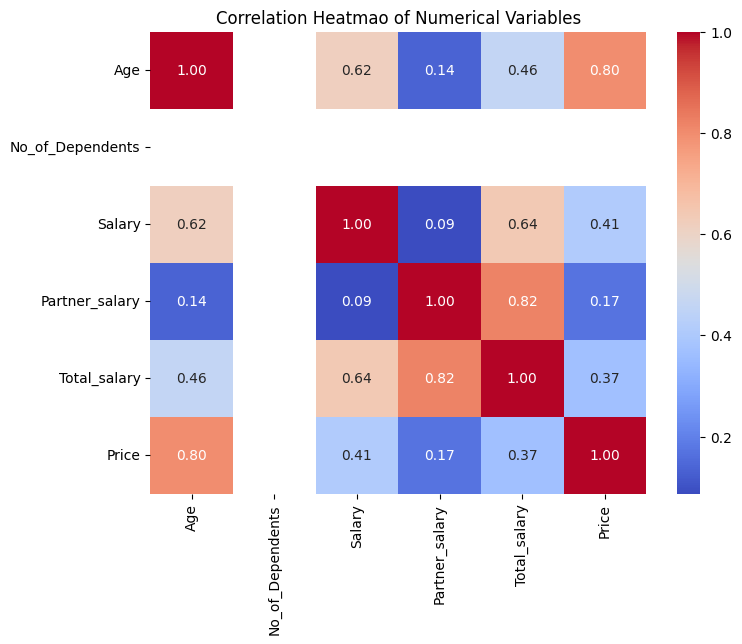

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmao of Numerical Variables')
plt.show()

*   Age and vehicle price show a strong positive relationship, suggesting that older customers tend to purchase higher-priced vehicles.

*   Salary is moderately related to total household income, which is expected as individual earnings form a major part of total salary.

*   Partner salary has a strong influence on total salary, highlighting the importance of dual income households.
*   Total salary shows a moderate association with vehicle price, indicating that higher household income generally leads to higher spending capacity.


*   Age and salary are positively related, reflecting income growth with experience and career progression.


*   Number of dependents shows little to no correlation with income or price, suggesting limited direct impact on purchasing decisions.

##Exploring the relationship between Categorical and Numerical variables

###Gender vs Numerical Variables

/tmp/ipython-input-2251408180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender',y='Salary',data=df,estimator=np.mean,


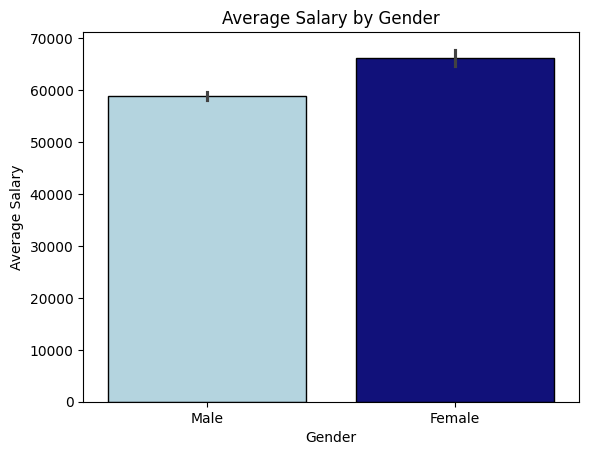

In [ ]:
#Gender vs Salary
plt.figure()

ax = sns.barplot(x='Gender',y='Salary',data=df,estimator=np.mean,
    palette={'Male': 'lightblue', 'Female': 'darkblue'},edgecolor='black')
plt.title('Average Salary by Gender')
plt.ylabel('Average Salary')
plt.show()




*   Female customers show a slightly higher average salary compared to male customers.
*   The difference in average salary between genders is present but not very large.


*   Overall, salary levels appear fairly comparable across genders in this dataset.






/tmp/ipython-input-3046753691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender', y = 'Price', data = df, estimator = np.mean, palette = {'Male': 'Lightblue', 'Female': 'darkblue'}, edgecolor = 'black')


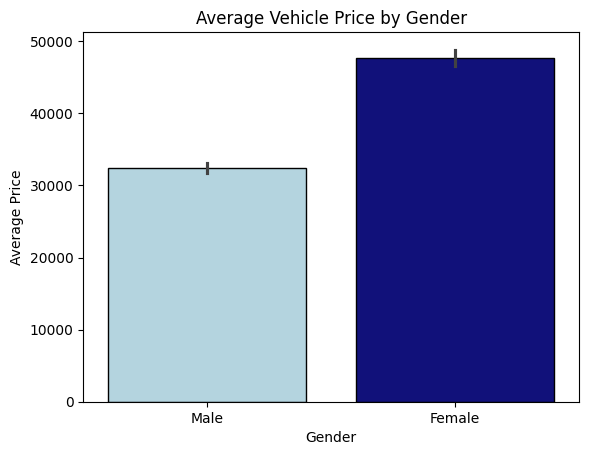

In [ ]:
#Gender vs Price
plt.figure()
sns.barplot(x = 'Gender', y = 'Price', data = df, estimator = np.mean, palette = {'Male': 'Lightblue', 'Female': 'darkblue'}, edgecolor = 'black')
plt.title('Average Vehicle Price by Gender')
plt.ylabel('Average Price')
plt.show()



*   Female customers tend to purchase higher priced vehicles on average compared to male customers.

*   The difference in average vehicle price between genders is quite noticeable.
*   This suggests that gender based preferences or purchasing capacity may influence vehicle selection in this dataset.






###Profession vs Income

/tmp/ipython-input-55924541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Profession', y = 'Salary', data = df, estimator = np.mean, palette = {'Business': 'lightgreen', 'Salaried': 'darkgreen'}, edgecolor = 'black')


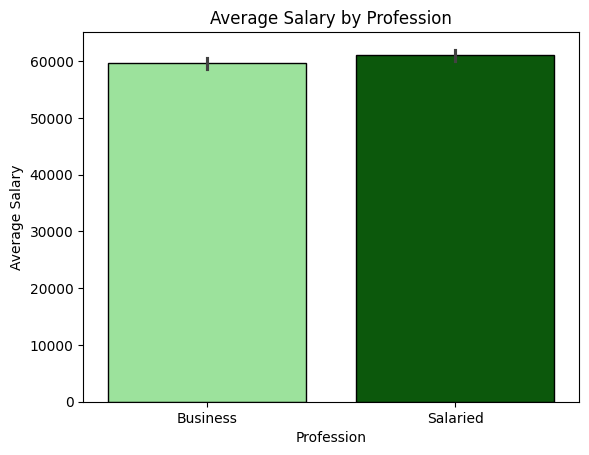

In [ ]:
#Profession vs Salary
plt.figure()
sns.barplot(x = 'Profession', y = 'Salary', data = df, estimator = np.mean, palette = {'Business': 'lightgreen', 'Salaried': 'darkgreen'}, edgecolor = 'black')
plt.title('Average Salary by Profession')
plt.ylabel('Average Salary')
plt.show()



*   Salaried individuals show a slightly higher average salary compared to those in business.

*   The difference in average salary between the two professions is small, indicating comparable earning levels.
*   Overall, profession does not appear to create a major salary gap in this dataset.





/tmp/ipython-input-333684196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Profession', y = 'Total_salary', data = df, estimator = np.mean,palette = {'Business': 'lightgreen', 'Salaried': 'darkgreen'}, edgecolor = 'black')


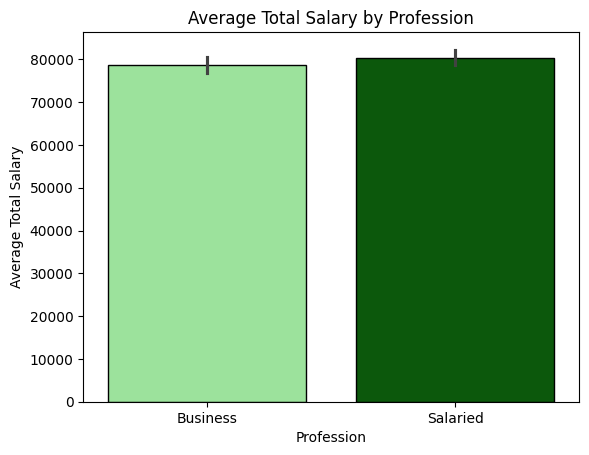

In [ ]:
#Profession vs Total Salary
plt.figure()
sns.barplot(x = 'Profession', y = 'Total_salary', data = df, estimator = np.mean,palette = {'Business': 'lightgreen', 'Salaried': 'darkgreen'}, edgecolor = 'black')
plt.title('Average Total Salary by Profession')
plt.ylabel('Average Total Salary')
plt.show()



*   Salaried customers have a slightly higher average total household income compared to business customers.

*   The difference in total salary between the two professions is not very large, indicating similar overall earning capacity.
*   This suggests that profession alone does not strongly differentiate total household income in the dataset.






###Education vs Numerical Variables

/tmp/ipython-input-429751419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Education', y = 'Salary', data = df, estimator = np.mean,palette = {'Post Graduate': 'lightyellow', 'Graduate': 'yellow'}, edgecolor = 'black')


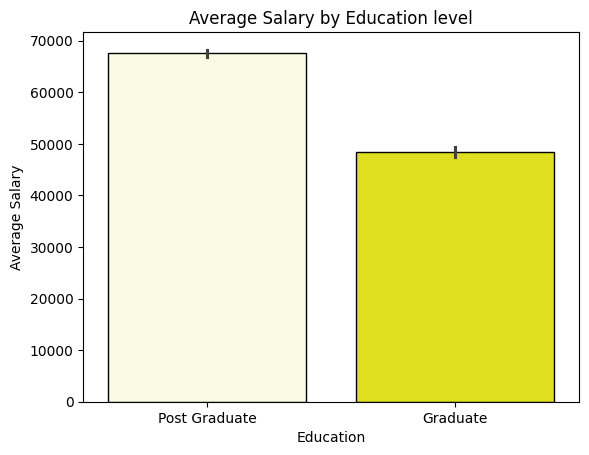

In [ ]:
#Education vs Salary
plt.figure()
sns.barplot(x = 'Education', y = 'Salary', data = df, estimator = np.mean,palette = {'Post Graduate': 'lightyellow', 'Graduate': 'yellow'}, edgecolor = 'black')
plt.title('Average Salary by Education level')
plt.ylabel('Average Salary')
plt.show()



*   Post graduates customers have a noticeably higher average salary compared to graduates.
*   The difference suggests that higher education is associated with better earning potential in this dataset.


*   Overall, education level appears to have a clear impact on salary levels.






/tmp/ipython-input-2997953840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Education', y = 'Price', data = df, estimator = np.mean,palette = {'Post Graduate': 'lightyellow', 'Graduate': 'yellow'}, edgecolor = 'black')


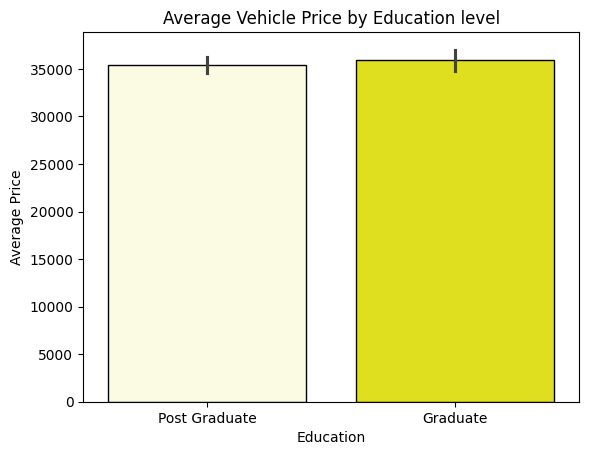

In [ ]:
#Education vs Price
plt.figure()
sns.barplot(x = 'Education', y = 'Price', data = df, estimator = np.mean,palette = {'Post Graduate': 'lightyellow', 'Graduate': 'yellow'}, edgecolor = 'black')
plt.title('Average Vehicle Price by Education level')
plt.ylabel('Average Price')
plt.show()



*   The average vehicle price is very similar across both education levels.

*   There is no significant difference in vehicle spending between graduates and post graduates.
*   This suggests that education level alone does not strongly influence vehicle price decisions in this dataset.






###Marital Status vs Numerical Variable

/tmp/ipython-input-3017451709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Marital_status', y = 'Total_salary', data = df, estimator = np.mean,palette = {'Married': 'pink', 'Single': 'deeppink'}, edgecolor = 'black')


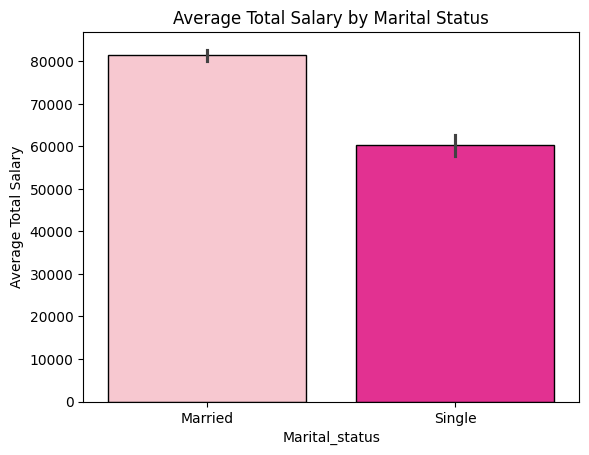

In [ ]:
#Marital Status vs Total Salary
plt.figure()
sns.barplot(x = 'Marital_status', y = 'Total_salary', data = df, estimator = np.mean,palette = {'Married': 'pink', 'Single': 'deeppink'}, edgecolor = 'black')
plt.title('Average Total Salary by Marital Status')
plt.ylabel('Average Total Salary')
plt.show()



*   Married customers have a higher average total household income compared to single customers.
*   This difference likely reflects the presence of dual income households among married individuals.


*   Overall, marital status appears to have a noticeable impact on total salary in this dataset.






###Partner Working vs Income

/tmp/ipython-input-1077013944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Partner_working', y = 'Total_salary', data = df, estimator = np.mean,palette={'Yes': 'plum', 'No': 'purple'}, edgecolor = 'black')


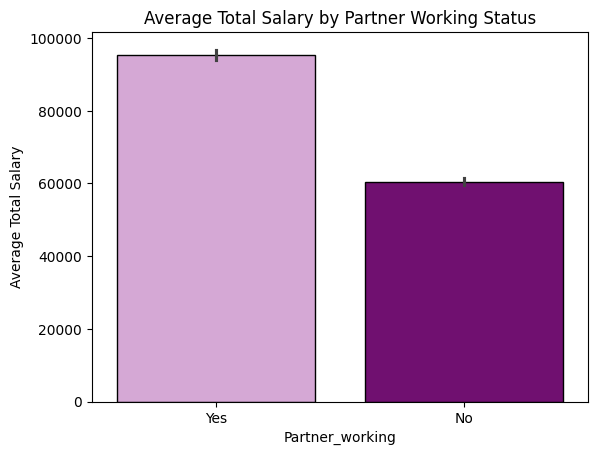

In [ ]:
#Partner Working vs Total Salary
plt.figure()
sns.barplot(x = 'Partner_working', y = 'Total_salary', data = df, estimator = np.mean,palette={'Yes': 'plum', 'No': 'purple'}, edgecolor = 'black')
plt.title('Average Total Salary by Partner Working Status')
plt.ylabel('Average Total Salary')
plt.show()



*   Households where the partner is working have a significantly higher average total income.

*   The difference clearly highlights the impact of dual income households on overall earnings.
*   Partner working status appears to be a strong factor influencing total salary in this dataset.





###Loan Status vs Price

/tmp/ipython-input-3087104051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Personal_loan', y = 'Price', data = df, estimator = np.mean, palette={'Yes': 'lightcoral', 'No': 'red'}, edgecolor = 'black')


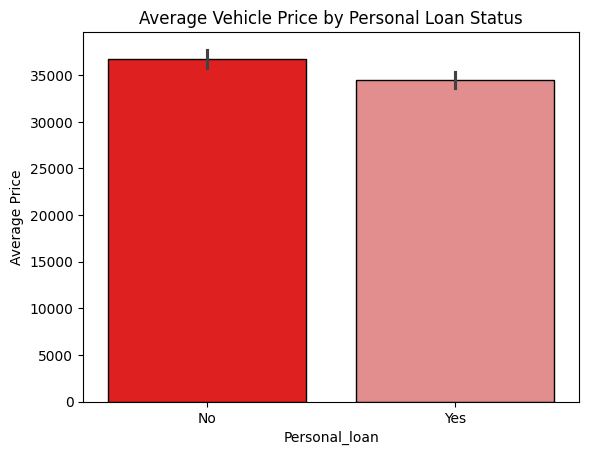

In [ ]:
#Personal Loan vs Price
plt.figure()
sns.barplot(x = 'Personal_loan', y = 'Price', data = df, estimator = np.mean, palette={'Yes': 'lightcoral', 'No': 'red'}, edgecolor = 'black')
plt.title('Average Vehicle Price by Personal Loan Status')
plt.ylabel('Average Price')
plt.show()

/tmp/ipython-input-2292552782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'House_loan', y = 'Price', data = df, estimator = np.mean, palette={'Yes': 'lightcoral', 'No': 'red'}, edgecolor = 'black')


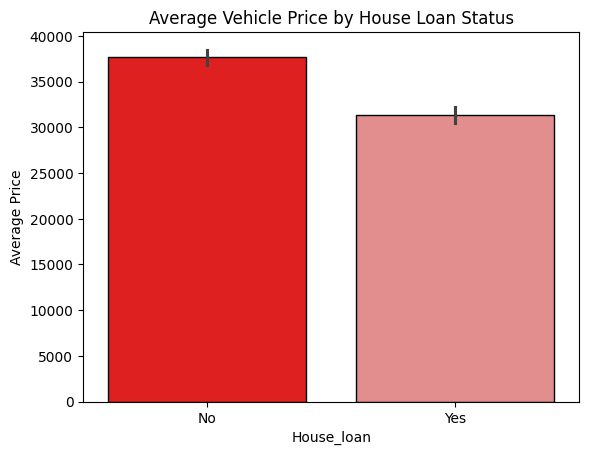

In [ ]:
#House Loan vs Price
plt.figure()
sns.barplot(x = 'House_loan', y = 'Price', data = df, estimator = np.mean, palette={'Yes': 'lightcoral', 'No': 'red'}, edgecolor = 'black')
plt.title('Average Vehicle Price by House Loan Status')
plt.ylabel('Average Price')
plt.show()



*   Customers without a personal loan purchase slightly higher priced vehicles on average.

*   The difference in average vehicle price between loan holders and non loan holders is very large.
*   This suggests that personal loan status does not strongly influence vehicle price decisions in this dataset.






###Vehicle Make vs Numerical Variables

/tmp/ipython-input-1758634594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Make', y = 'Price', data = df, estimator = np.mean,palette = {'SUV': 'moccasin', 'Sedan': 'lightsalmon', 'Hatchback': 'chocolate'}, edgecolor = 'black')


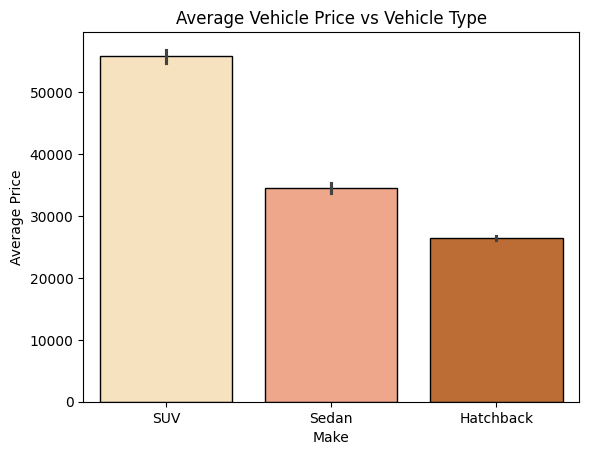

In [ ]:
#Make vs Price
plt.figure()
sns.barplot(x = 'Make', y = 'Price', data = df, estimator = np.mean,palette = {'SUV': 'moccasin', 'Sedan': 'lightsalmon', 'Hatchback': 'chocolate'}, edgecolor = 'black')
plt.title('Average Vehicle Price vs Vehicle Type')
plt.ylabel('Average Price')
plt.show()



*   SUVs have the highest average price, clearly positioned as a premium vehicle segment.

*   Sedans fall in the mid price range, balancing affordability and features.
*   Hatchbacks are the most affordable option, targeting budget-conscious customers.


*   The clear price gap between vehicle types shows well defined market segmentation, which can help in designing focused marketing strategies.



/tmp/ipython-input-3765907016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Make', y = 'Total_salary', data = df, estimator = np.mean,palette = {'SUV': 'moccasin', 'Sedan': 'lightsalmon', 'Hatchback': 'chocolate'}, edgecolor = 'black')


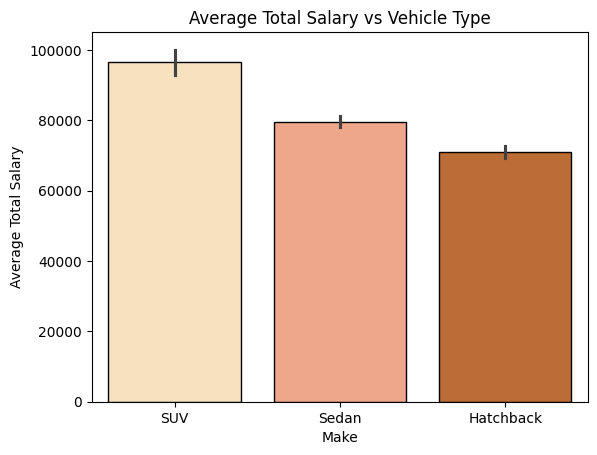

In [ ]:
#Make vs Total Salary
plt.figure()
sns.barplot(x = 'Make', y = 'Total_salary', data = df, estimator = np.mean,palette = {'SUV': 'moccasin', 'Sedan': 'lightsalmon', 'Hatchback': 'chocolate'}, edgecolor = 'black')
plt.title('Average Total Salary vs Vehicle Type')
plt.ylabel('Average Total Salary')
plt.show()



*   Customers choosing SUVs have the highest average total salary, indicating higher purchasing power.

*   Sedan buyers fall in the middle, suggesting a balance between affordability and income level.
*  Hatchback buyers have the lowest average total salary, pointing toward a more budget conscious segment.


*   This pattern shows that vehicle choice strongly aligns with customer income, which is useful for targeted marketing and pricing strategies.



/tmp/ipython-input-1526429868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Make', y = 'Salary', data = df, estimator = np.mean,palette = {'SUV': 'moccasin', 'Sedan': 'lightsalmon', 'Hatchback': 'chocolate'}, edgecolor = 'black')


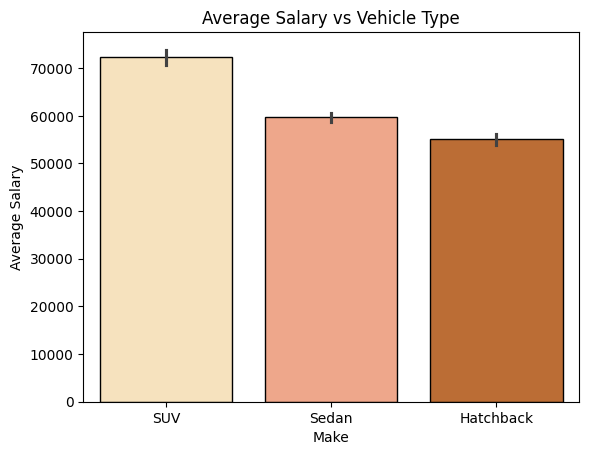

In [ ]:
#Make vs Salary
plt.figure()
sns.barplot(x = 'Make', y = 'Salary', data = df, estimator = np.mean,palette = {'SUV': 'moccasin', 'Sedan': 'lightsalmon', 'Hatchback': 'chocolate'}, edgecolor = 'black')
plt.title('Average Salary vs Vehicle Type')
plt.ylabel('Average Salary')
plt.show()



*   SUV buyers have the highest average salary, suggesting they belong to a higher income group.

*   Sedan buyers fall in the middle, indicating moderate earning capacity.
*   Hatchback buyers have the lowest average salary, which shows that cost plays a bigger role in their purchase decision.






#Key Questions

##Do men tend to prefer SUVs more compared to women?

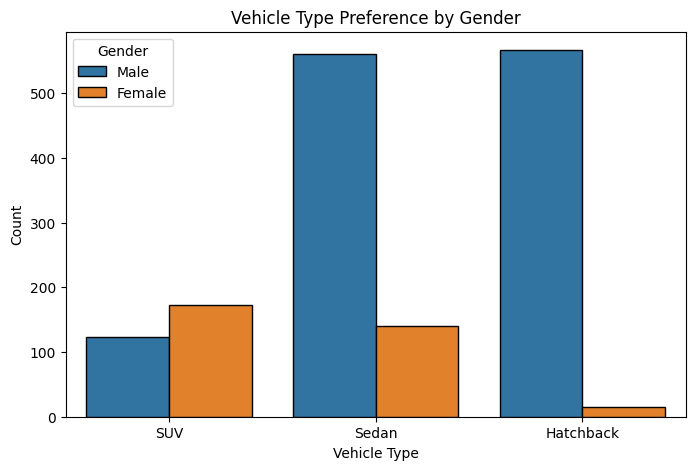

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x='Make', hue='Gender', data=df, edgecolor='black')
plt.title('Vehicle Type Preference by Gender')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()



*   Men predominantly prefer Sedans and Hatchbacks, while women show a relatively hugher preference for SUVs compared to other vehicle types.

*   Hatchbacks are least preferred by women, whereas male preferences are more evenly Sedans and Hatchbacks.




##What is the likelihood of a salaried person buying a Sedan?

44.19642857142857


/tmp/ipython-input-2836624516.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = salaried_vehicle_counts.index, y = salaried_vehicle_counts.values, palette = 'Blues')


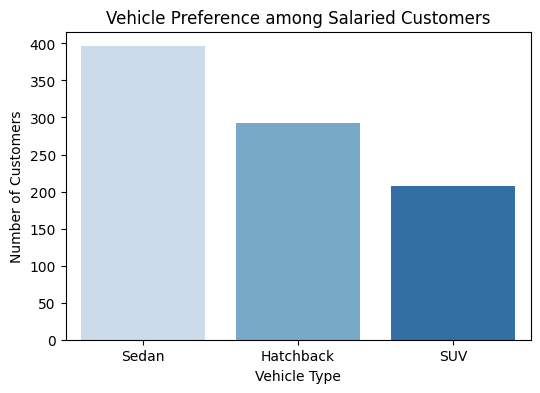

In [ ]:
salaried_df = df[df['Profession'] == 'Salaried']
salaried_vehicle_counts = salaried_df['Make'].value_counts()

#Percentage of people likelihood of buying a sedan
likelihood_sedan = (salaried_vehicle_counts['Sedan'] / salaried_vehicle_counts.sum())
print(likelihood_sedan * 100)

#Visualization through bar plot
plt.figure(figsize=(6,4))
sns.barplot(x = salaried_vehicle_counts.index, y = salaried_vehicle_counts.values, palette = 'Blues')
plt.title('Vehicle Preference among Salaried Customers')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Customers')
plt.show()

Around 44.2% of salaried customers prefer Sedans, making it the most popular choice within this group.

##What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

Make
Sedan        305
Hatchback    277
SUV           90
Name: count, dtype: int64


/tmp/ipython-input-2075183930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Make', data = salaried_male, palette = 'Blues')


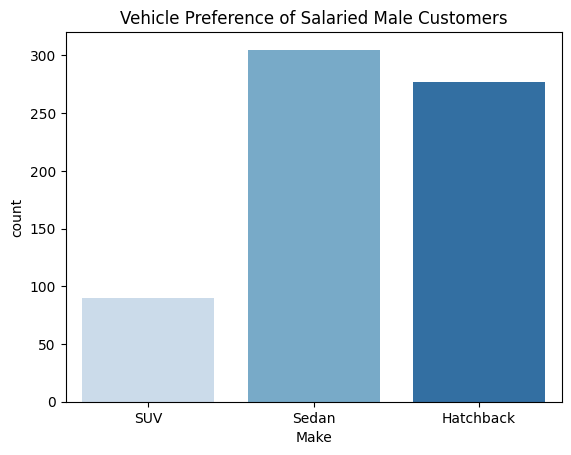

In [ ]:
salaried_male = df[(df['Profession'] == 'Salaried') & (df['Gender'] == 'Male')]
print(salaried_male['Make'].value_counts())

sns.countplot(x='Make', data = salaried_male, palette = 'Blues')
plt.title('Vehicle Preference of Salaried Male Customers')
plt.show()

The data does not support Sheldon Cooper's claim, as salaried male customers show a higher preference for Sedans than SUVs, with Sedan purchases significantly exceeding SUV purchases among this group, indicating that salaried males are not an easier target for SUV sales compared to Sedan sales.

##How does the amount spent on purchasing automobiles vary by gender?

/tmp/ipython-input-3813224924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='Price',data=df,estimator = np.mean, palette=['steelblue','lightcoral'],edgecolor='black')


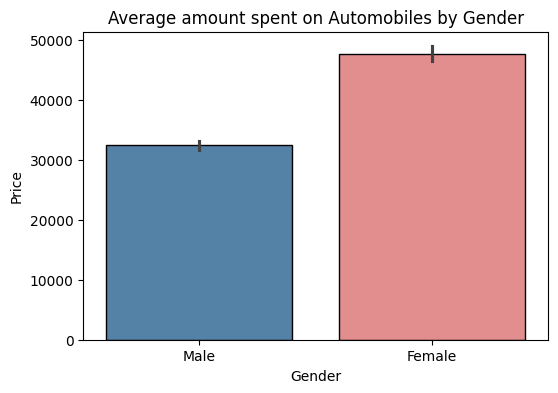

In [ ]:
df.groupby('Gender')['Price'].mean()
plt.figure(figsize = (6,4))
sns.barplot(x='Gender',y='Price',data=df,estimator = np.mean, palette=['steelblue','lightcoral'],edgecolor='black')
plt.title('Average amount spent on Automobiles by Gender')
plt.xlabel('Gender')
plt.show()

Female customers spend more on average per vehicle compared to male customers, indicating a tendency towards higher priced automobile purchases.

##How much money was spent on purchasing automobiles by individuals who took a personal loan?

27290000
34457.07070707071


/tmp/ipython-input-3723072186.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Personal_loan', y='Price', data=df, estimator = np.mean, palette= ['lightcoral','firebrick'], edgecolor = 'black')


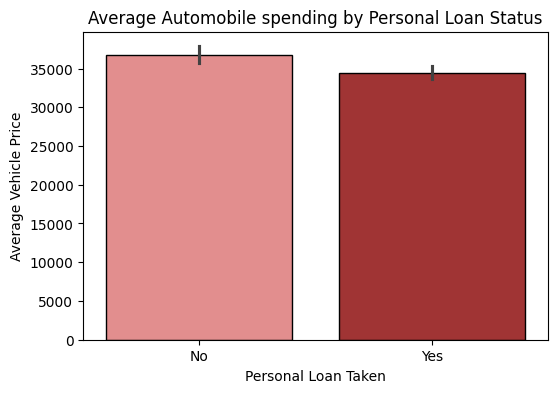

In [ ]:
loan_customers = df[df['Personal_loan'] == 'Yes']
total_spent = loan_customers['Price'].sum()
average_spent = loan_customers['Price'].mean()
print (total_spent)
print(average_spent)

plt.figure(figsize=(6,4))
sns.barplot(x='Personal_loan', y='Price', data=df, estimator = np.mean, palette= ['lightcoral','firebrick'], edgecolor = 'black')
plt.title('Average Automobile spending by Personal Loan Status')
plt.ylabel('Average Vehicle Price')
plt.xlabel('Personal Loan Taken')
plt.show()

Individuals who took a personal loan spent a total of 27290000$ on purchasing automobiles, with an average spend of about 34457 dollars per vehicle.

##How does having a working partner influence the purchase of higher-priced cars?

/tmp/ipython-input-487714084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Partner_working',y='Price',data=df,estimator=np.mean,palette = ['plum','purple'], edgecolor='black')


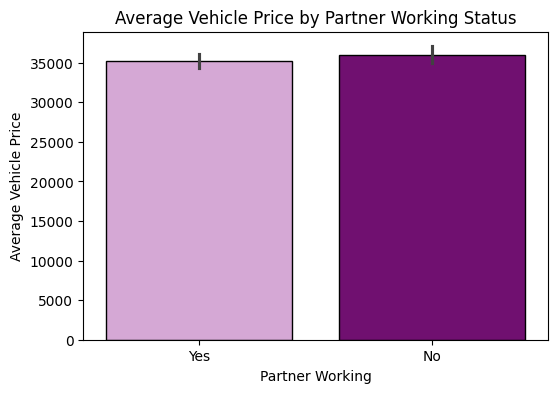

In [ ]:
df.groupby('Partner_working')['Price'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x='Partner_working',y='Price',data=df,estimator=np.mean,palette = ['plum','purple'], edgecolor='black')
plt.title('Average Vehicle Price by Partner Working Status')
plt.xlabel('Partner Working')
plt.ylabel('Average Vehicle Price')
plt.show()

Customers with and without a working partner spend almost the same on vehicle purchases, indicating that partner working status has minimal impact on buying higher-priced cars.